In [352]:
import pandas as pd
import missingno as msno
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import numpy as np

In [446]:
#I don't want an additional index column to be added
happinessScores = pd.read_csv('LadderScores_2014-2018.csv', index_col=0)
happinessScoresNoNulls = pd.read_csv('LadderScoresNoNulls_2014-2018.csv', index_col=0)
happinessData = pd.read_csv('FullAnalysisDataSet.csv', index_col=0)

<h2> Analyse Missing Values <h2>

<AxesSubplot:>

<Figure size 500x500 with 0 Axes>

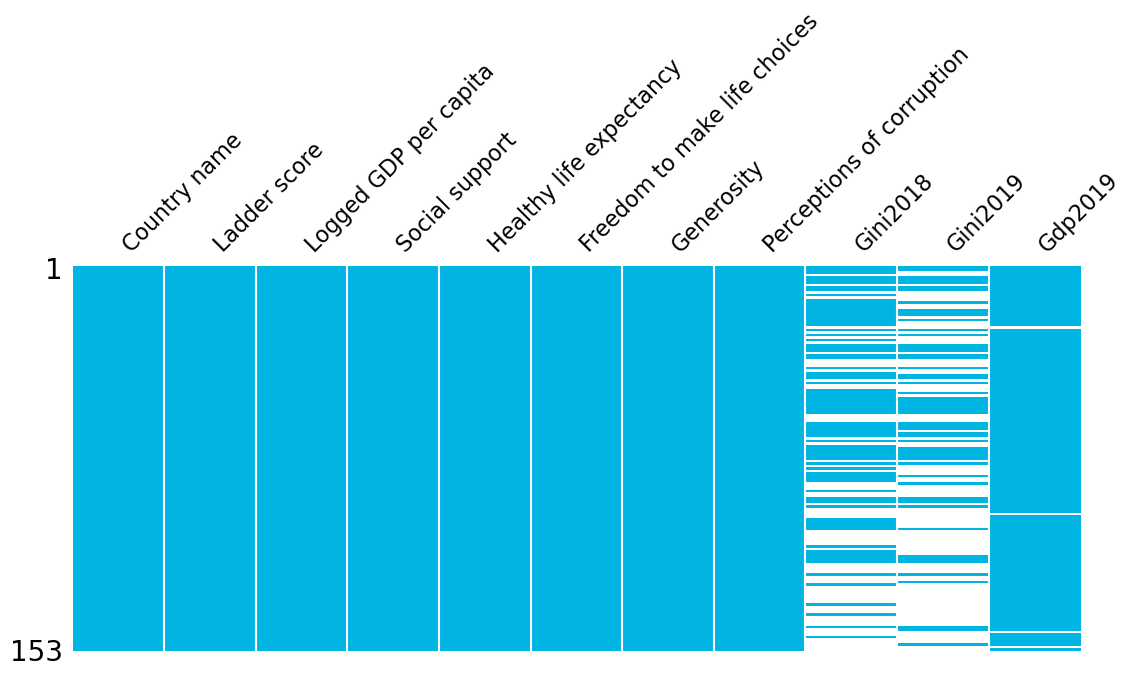

In [33]:
#Matrix Visualization
plt.figure( figsize= (5,5))
#Color in matrix plot requires RGB values from 0 to 1, hence divide the RGB color values by 255
msno.matrix(happinessData[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Gini2018', 'Gini2019', 'Gdp2019']], figsize= (13,5), sparkline = False,  fontsize=16, color=(0/255, 181/255, 226/255))
#plt.savefig('media2.0/missingValuesMatrix.png', bbox_inches = 'tight')

In [55]:
#World Map Visualization
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()
world.drop(159, inplace= True) #159 is the index of Antartica, I don't need it on the world map plot
world.rename( columns= {'iso_a3': 'Country Code' }, inplace= True)

In [56]:
#Merge left because I need all the countries for the world map plot, I don't want some to be dropped
worldLadder = pd.merge(world, happinessData[['Country Code', 'Ladder score', 'Gini2018', 'Gdp2019']], how = 'left', on = 'Country Code' )

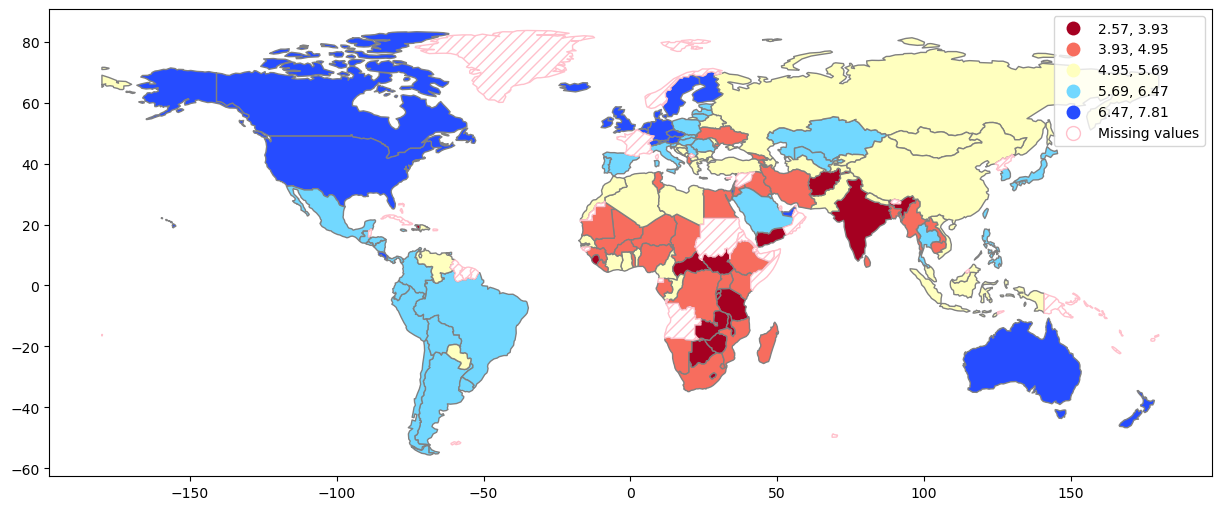

In [141]:
#https://geopandas.org/en/stable/docs/user_guide/mapping.html
#Code obtained from geopandas documentation
#pip install mapclassify in case of mapclassify version error

#worldLadder.plot(column='Ladder score', missing_kwds={'color': 'lightgrey'}); very simple alternative
#https://geopandas.org/en/stable/gallery/choropleths.html for schemes
#https://matplotlib.org/stable/tutorials/colors/colormaps.html for colormaps
#pip install palettable
#https://stackoverflow.com/questions/60013184/how-do-i-call-a-color-from-a-palettable-colormap-in-python to use palettable
from palettable.scientific.diverging import Roma_12
from palettable.cmocean.diverging import Balance_6, Balance_9
from palettable.cartocolors.diverging import TealRose_3, TealRose_4, Temps_3, Tropic_5
from matplotlib.colors import ListedColormap
from palettable.lightbartlein.diverging import BlueOrange8_7, BlueOrange12_5, RedYellowBlue_5, RedYellowBlue_7, RedYellowBlue_11

worldLadder.plot(
    column="Ladder score",
    legend=True,
    scheme="natural_breaks", #will break the indicators in the legend to equal intervals
    k = 5, #number of categories
    cmap = ListedColormap(RedYellowBlue_11.mpl_colors),
    figsize=(15, 10),
    edgecolor = 'grey',
    missing_kwds={
        "color": "white",
        "edgecolor": "pink",
        "hatch": "///",
        "label": "Missing values",
    },
);
#plt.savefig('media2.0/worldmap.png', bbox_inches = 'tight')

<h2> Analyse Correctness of GDP <h2>

C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\eilaf\anaconda3\envs\datakougi\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


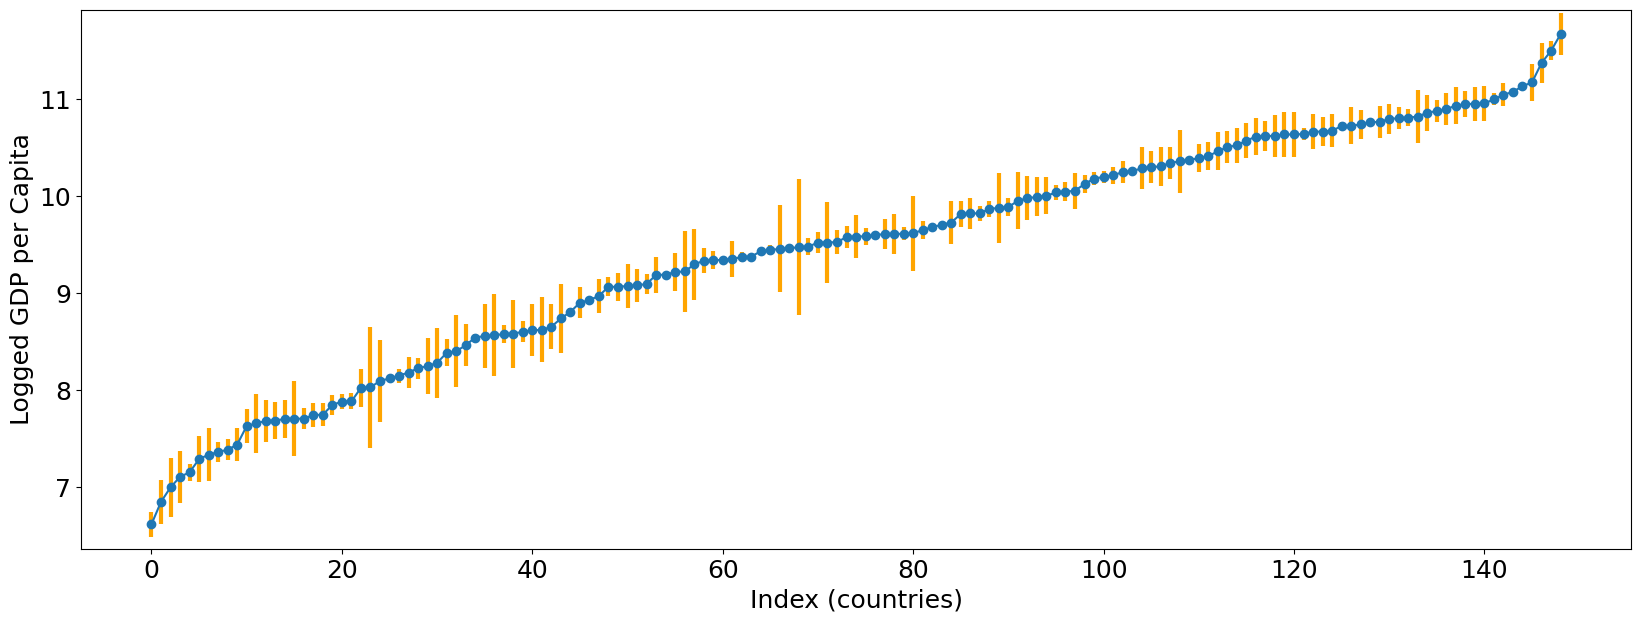

In [164]:
gdpdf = happinessData[['Country name', 'Gdp2019','Logged GDP per capita']]
gdpdf.sort_values(by = 'Gdp2019', inplace = True) #for a clean plot

gdp_estimate = gdpdf['Logged GDP per capita']
gdp_original = np.log(gdpdf['Gdp2019'])
gdp_err = gdp_original - gdp_estimate

plt.figure(figsize= (20, 7))

plt.ylabel('Logged GDP per Capita')
plt.xlabel('Index (countries)')

plt.errorbar( np.arange(153), gdp_original, yerr= gdp_err, fmt = 'o-',
              ecolor='orange', mew=1, elinewidth = 3 )

plt.savefig('media2.0\\errobars.png', bbox_inches = 'tight')

In [178]:
#R_squared
x = np.sum((gdp_original - gdp_estimate)**2)
y = np.sum((gdp_original - np.mean(gdp_original))**2)
1 - (x/y)

0.9687925650110667

<h2> Resonableness of values using histograms <h2>

In [403]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['font.size'] = 18 #set font for all figure parameters
%matplotlib inline

In [ ]:
#Calculating mean and standard deviation
np.mean(happinessData['Ladder score'])
np.std(happinessData['Ladder score'])

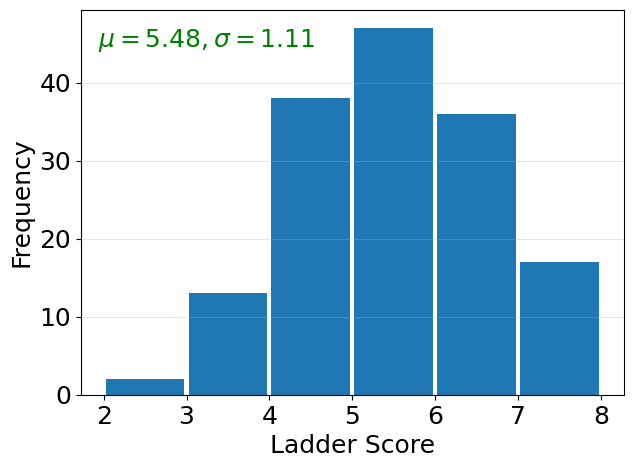

In [363]:
plt.figure(figsize=(7, 5))

plt.grid(axis='y', alpha=0.3)
plt.xlabel('Ladder Score', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
#plt.title('', fontsize = 16)

plt.hist( happinessData['Ladder score'], bins=[2, 3, 4, 5, 6, 7, 8], rwidth=0.95 )
#plt.text(2, 41, r'$\mu=5.48, \sigma=1.11$', color = 'green', fontsize = 16)
plt.annotate(r'$\mu=5.48, \sigma=1.11$', color = 'green', xy=(0, 1), xytext=(12, -12), va='top',
             xycoords='axes fraction', textcoords='offset points')
plt.show()
#plt.savefig('media2.0\\Ladderhistogram.png', bbox_inches = 'tight')

In [187]:
#Calculating mean and standard deviation
np.mean(happinessData['Healthy life expectancy'])
np.std(happinessData['Healthy life expectancy'])

64.44552916483163

In [371]:
plt.figure(figsize=(7, 5))

plt.grid(axis='y', alpha=0.3)
plt.xlabel('Life Expectancy [Years]', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
#plt.title('', fontsize = 16)

plt.hist( happinessData['Healthy life expectancy'], bins=[45, 50, 55, 60, 65, 70, 75, 80], rwidth=0.95, color= '#c585f7', alpha = 0.8 )
#ax.text( 0,0.5,  r'$\mu=64.5, \sigma=7.1$', color = 'orange', fontsize = 16, transform = ax.transAxes)
plt.annotate(r'$\mu=64.5, \sigma=7.1$', xy=(0, 1), xytext=(12, -12), va='top',
xycoords='axes fraction', textcoords='offset points', color = 'green')

plt.savefig('media2.0\\LifeExpectencyhistogram.png', bbox_inches = 'tight')

In [244]:
happinessData['Healthy life expectancy'].max()

76.80458068847656

<h2>Analysing Reliability </h2>
<body> Will check the consistency of the Ladder score across different years, i.e. the correlation between country's scores and ranks for consecutive years </body>

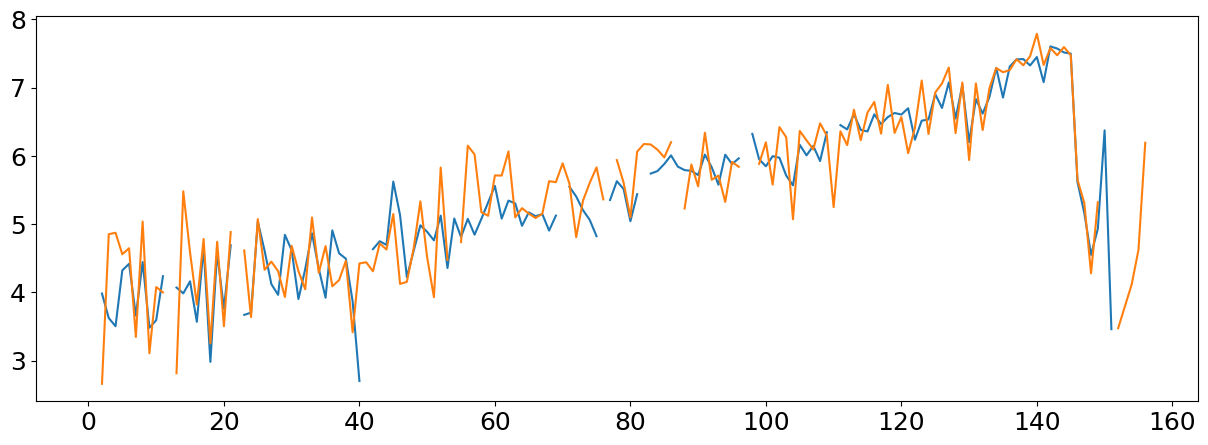

In [374]:
happinessScores.sort_values(by = 'LadderScore2014', inplace = True)
plt.figure(figsize= (15, 5))
plt.plot(np.arange(159), happinessScores['LadderScore2015'], np.arange(159),happinessScores['LadderScore2017'])
plt.show()

In [376]:
happinessScoresNoNulls

,Country name,LadderScore2014,LadderScore2015,LadderScore2016,LadderScore2017,LadderScore2018
0,Afghanistan,3.130896,3.982855,4.220169,2.661718,2.694303
1,Albania,4.813763,4.606651,4.511101,4.639548,5.004403
2,Argentina,6.671114,6.697131,6.427221,6.039330,5.792797
3,Armenia,4.453083,4.348320,4.325472,4.287736,5.062449
4,Australia,7.288550,7.309061,7.250080,7.257038,7.176993
...,...,...,...,...,...,...
116,Venezuela,6.136096,5.568800,4.041115,5.070751,5.005663
117,Vietnam,5.084923,5.076315,5.062267,5.175279,5.295547
118,Yemen,3.967958,2.982674,3.825631,3.253560,3.057514
119,Zambia,4.345837,4.843164,4.347544,3.932777,4.041488


<AxesSubplot:xlabel='LadderScore2015', ylabel='LadderScore2017'>

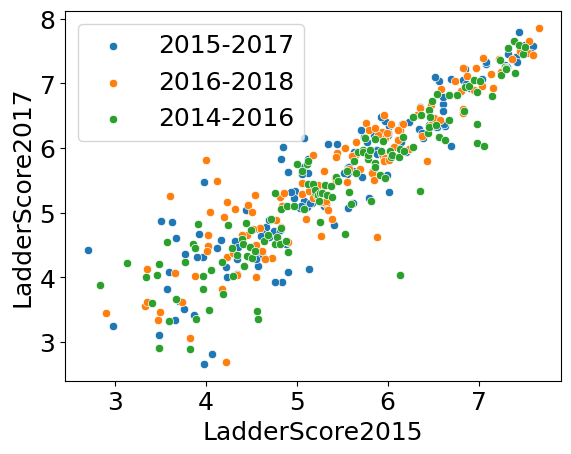

In [418]:
sns.scatterplot(x = happinessScores['LadderScore2015'], y = happinessScores['LadderScore2017'], data = happinessScores, label = '2015-2017' )
sns.scatterplot(x = happinessScores['LadderScore2016'], y = happinessScores['LadderScore2018'], data = happinessScores, label = '2016-2018' )
sns.scatterplot(x = happinessScores['LadderScore2014'], y = happinessScores['LadderScore2016'], data = happinessScores, label = '2014-2016' )

In [300]:
for i in range(121):
    print(stats.pearsonr(happinessScoresNoNulls.iloc[i, 1:3], happinessScoresNoNulls.iloc[i, 3:5]))

(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(-1.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(1.

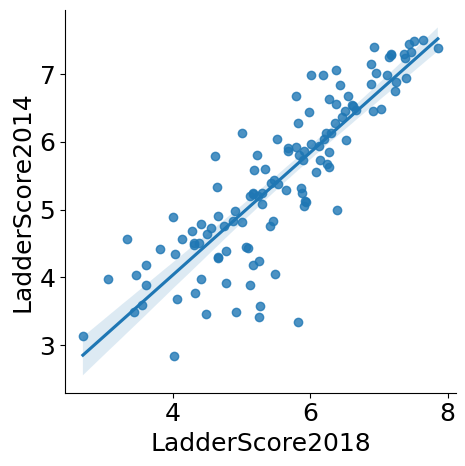

In [380]:
sns.lmplot(y='LadderScore2014', x='LadderScore2018', data=happinessScoresNoNulls)
plt.show()

In [409]:
#Plot the highest and lowest ladder score for 2018 and 2019 and check correlation for countries
lowest2018 = happinessScores.sort_values(by = 'LadderScore2018').iloc[:10, [0,5]]
highest2018 = happinessScores.sort_values(by = 'LadderScore2018', ascending= False).iloc[:10, [0,5]]

In [410]:
lowest2019 = happinessData.sort_values(by = 'Ladder score').iloc[:10, [0,3]]
highest2019 = happinessData.sort_values(by = 'Ladder score', ascending = False ).iloc[:10, [0,3]]

In [413]:
lowest_highest2018 = pd.concat([lowest2018, highest2018], ignore_index=True)
lowest_highest2019 = pd.concat([lowest2019, highest2019], ignore_index=True)

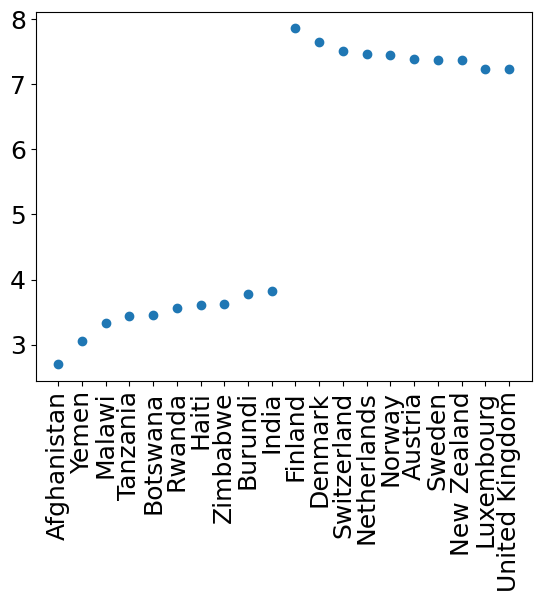

In [416]:
plt.plot( lowest_highest2018['Country name'], lowest_highest2018['LadderScore2018'], 'o' )
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.savefig('media2.0\\lowesthighest2018.png', bbox_inches = 'tight')

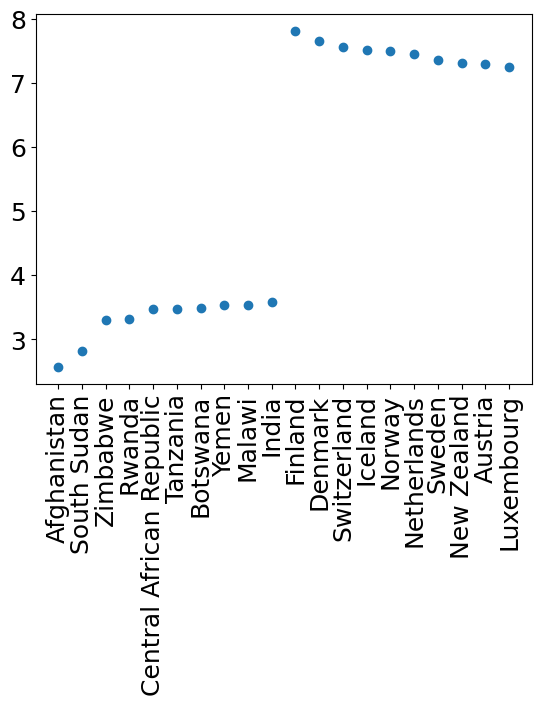

In [417]:
plt.plot( lowest_highest2019['Country name'], lowest_highest2019['Ladder score'], 'o' )
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.savefig('media2.0\\lowesthighest2019.png', bbox_inches = 'tight')

In [422]:
#Check the ranking correlation for highest countries and lowest countries
happinessScoresNoNulls['LadderScore2014'].corr( happinessScoresNoNulls['LadderScore2018'] )
happinessScoresNoNulls['LadderScore2018'].corr( happinessData['Ladder score'] )

0.031687021836271256

<AxesSubplot:>

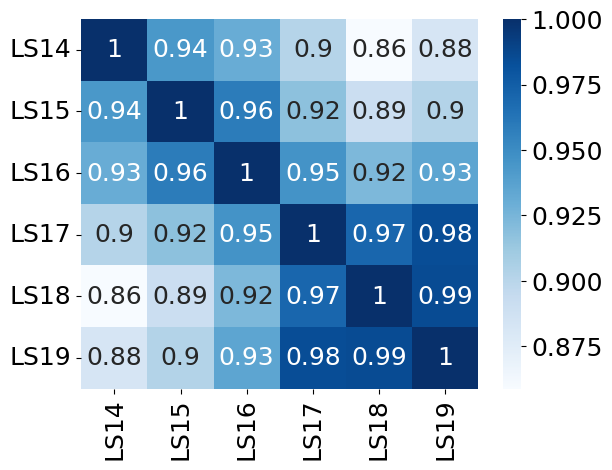

In [461]:
Allhappineess = pd.merge(happinessScoresNoNulls, happinessData.iloc[:, [1,3]].rename(columns = {'Ladder score': 'LadderScore2019'}), on = 'Country Code')
Allhappineess.rename( columns={ 'LadderScore2014': 'LS14', 'LadderScore2015': 'LS15', 'LadderScore2016': 'LS15', 'LadderScore2016': 'LS16', 'LadderScore2017':'LS17', 'LadderScore2018':'LS18', 'LadderScore2019':'LS19' }, inplace=True )
#plt.figure(figsize = (7,5))
Allhappineess.corr()
plt.xticks(rotation = 90)
sns.heatmap(Allhappineess.corr(), cmap = 'Blues', annot=True)
#plt.savefig('media2.0\\heatmap2.png', bbox_inches = 'tight')

<h2>Validity analysis </h2>
<body> Correlation with other measures such as suicide and life expectancy </body>

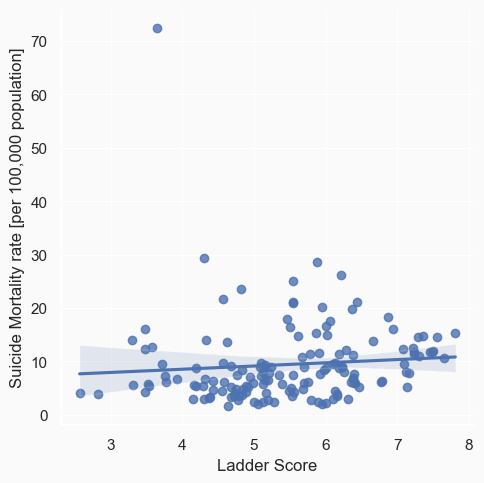

In [338]:
#define seaborn background colors
sns.set(rc={'axes.facecolor':'#fafafa', 'figure.facecolor':'#fafafa'})

sns_plot = sns.lmplot(y='Suicide2019', x='Ladder score', data=happinessData)
plt.xlabel('Ladder Score')
plt.ylabel('Suicide Mortality rate [per 100,000 population]')

sns_plot.savefig('media2.0/LadderVsSuicied.png')

In [312]:
#This is one outlier!!
happinessData[happinessData['Suicide2019'] > 60]

,Country name,Country Code,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Gini2018,Gini2019,Gdp2018,Gdp2019,Suicide2018,Suicide2019
142,Lesotho,LSO,Sub-Saharan Africa,3.6528,7.960488,0.780496,48.003624,0.738126,-0.145732,0.857392,NaN,NaN,2614.658849,2656.115855,76.6,72.4


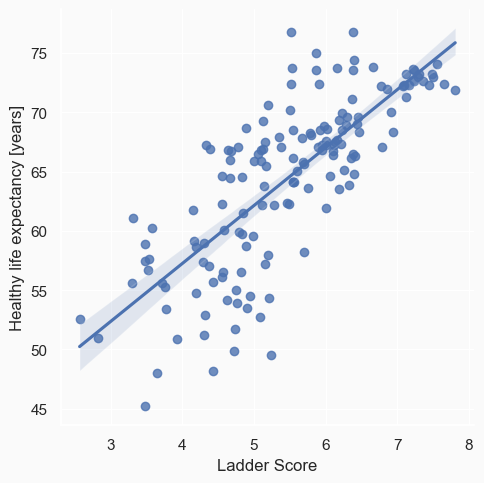

In [336]:
sns_plot = sns.lmplot(y = 'Healthy life expectancy', x = 'Ladder score', data = happinessData)
plt.xlabel('Ladder Score')
plt.ylabel('Healthy life expectancy [years]')
sns_plot.savefig('media2.0/LadderVsExpectancy.png')